<h1><font color= maroon><center><u>Bike Sharing Assignment</u></center> </font> </h1>

# Problem Statement:


A `bike-sharing system` is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider `BoomBikes` has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, `BoomBikes` aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to `understand the factors` on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. 

**Essentially, the company wants to know :**

- Which variables are significant in predicting the demand for shared bikes.


- How well those variables describe the bike demands.





## Business Goal

We are required to model the demand for shared bikes with the available `independent variables`.It will be used by the management to understand how exactly the demands vary with different features.They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations.Further, the model will be a good way for management to understand the demand dynamics of a new market. 



### Steps which we follow in Linear Regression : 

1. Reading, understanding and visualising the data
2. Preparing the data for modelling (train-test split, rescaling, etc.)
3. Training the model
4. Residual Analysis
5. Predictions and evaluation on the test set

## Step 1: Reading and Understanding the Data

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [28]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [29]:
# Import the numpy and pandas package

import numpy as np
import pandas as pd

In [30]:
# Read the given CSV file, and view some sample records

bike = pd.read_csv("day.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


**Let's inspect the various aspects of our dataframe**

In [31]:
#checking data frame dimensions
bike.shape

(730, 16)

In [32]:
#checking data frame info
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [33]:
#checking summary of all the columns
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [34]:
#checking data types of columns
bike.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

## Step 2: Visualising the Data


Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable


We'll visualise our data using `matplotlib` and `seaborn`.

In [35]:
#import libraries
import matplotlib.pyplot as plt 
import seaborn as sns

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

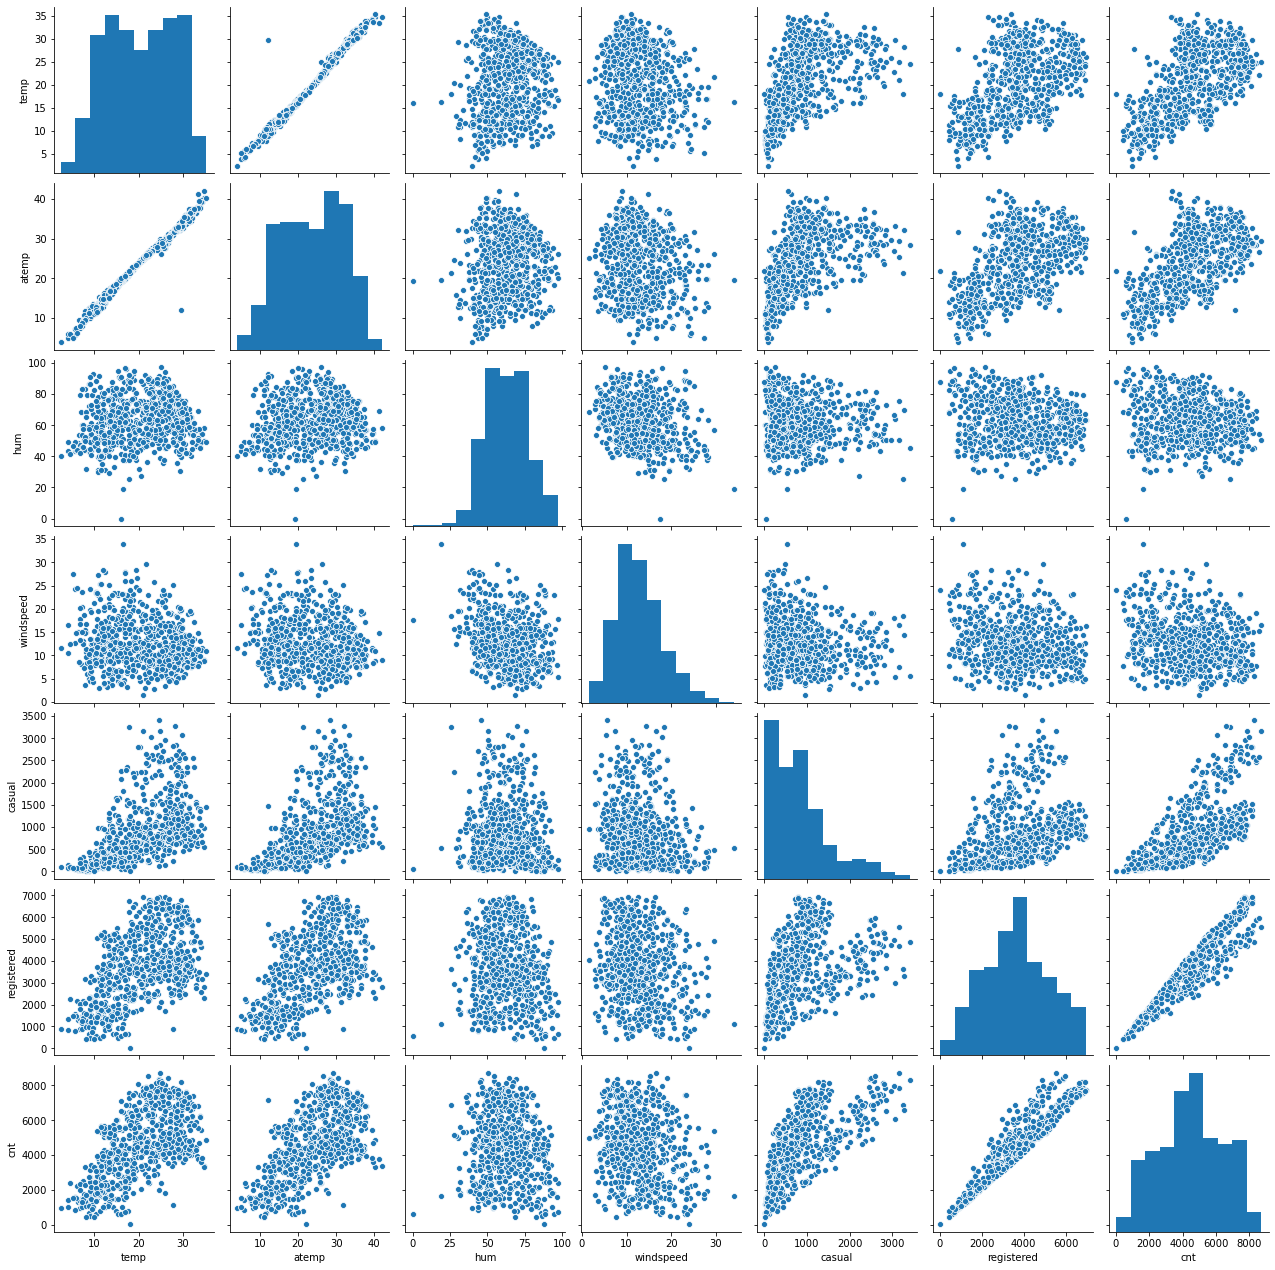

In [36]:
#prepare a list of all numeric variables
cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

#plot the continuous variables
sns.pairplot(bike[cols])
plt.show()

**Inferences:**


- We can see variable `temp` and `atemp` are highly correlated with each other. So, we can drop any one variable to avoid `multicollinearity`.


- There is a linear relationship between `registered` variable and target `cnt` variable.Hence, data is suitable for `Linear Regression` model.

#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot of these variables.

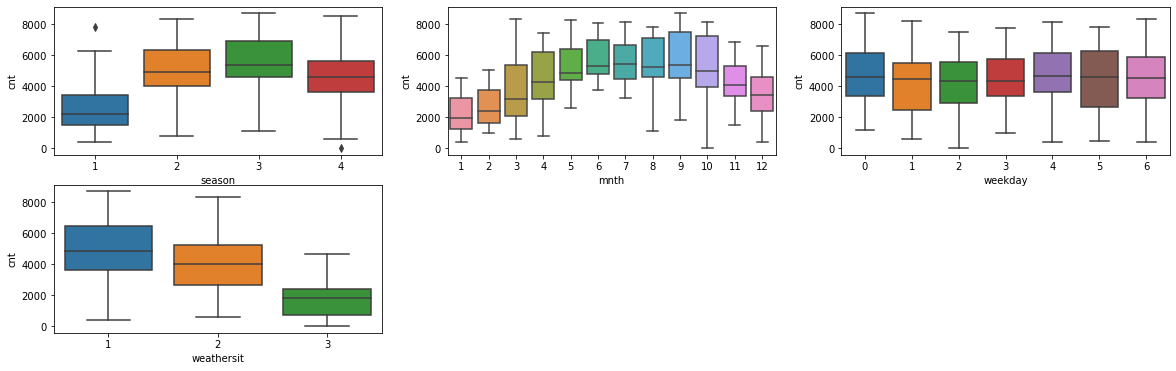

In [37]:
plt.figure(figsize=(20, 6))

#subplot-1
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)

#subplot-2
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)

#subplot-3
plt.subplot(2,3,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)

#subplot-4
plt.subplot(2,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)

plt.show()

**`Inference:`**

- Bike rentals are more in season `fall`, weathersit `clear` and in the month of `september`.



- We can't infer much detail about the variable `weekday` as we can see in the boxplot median of the `weekday 0,1,2,3,6` are nearly same median.



## Step 3: Data Preparation for modelling

In [38]:
#drop the unnecessary variables
bike = bike.drop(['instant', 'dteday', 'casual','registered'], axis=1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [39]:
#here we can see 'temp' and 'atemp' are highly correlated which may cause multicollinearity.Hence, we need to drop either of them.Variable 'atemp' is a 'feeling temperature' and 'temp' is 'actual temperature'. So these two are indicating same feature hence we can drop feeling temperature i.e. atemp variable.

bike=bike.drop(['atemp'], axis=1)
bike

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,5,1,2,10.420847,65.2917,23.458911,2114
726,1,1,12,0,6,0,2,10.386653,59.0000,10.416557,3095
727,1,1,12,0,0,0,2,10.386653,75.2917,8.333661,1341
728,1,1,12,0,1,1,1,10.489153,48.3333,23.500518,1796


In [40]:
#check the data types of all the columns and make the necessary changes
bike.dtypes

season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

 ## i) Encoding the labels and visualizations

### 1) season

- 1: spring

- 2: summer

- 3: fall

- 4: winter

In [41]:
# replacing variable values with its subsequent labels
bike['season'] = bike['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})

In [42]:
#cross-checking unique values of the variable summer
bike.season.unique()

array(['spring', 'summer', 'fall', 'winter'], dtype=object)

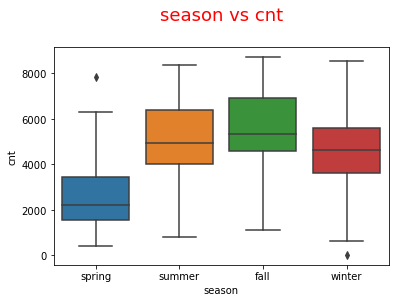

In [43]:
#plot boxplot of variable 'season' wrt target variable 'cnt'
sns.boxplot('season', 'cnt', data = bike)
plt.title('season vs cnt\n', fontdict={'fontsize':18, 'color':'red'})
plt.show()

**Inferences:**

- Bike Rentals are more during the `Fall(Monsoon)` season.

### 2) weathersit


- 1: Clear, Few clouds, Partly cloudy, Partly cloudy

- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [44]:
# replacing variable values with its subsequent labels
bike['weathersit'] = bike['weathersit'].map({1:'Clear',2:'Mist',3:'Light Snow',4:'Heavy Rain'})

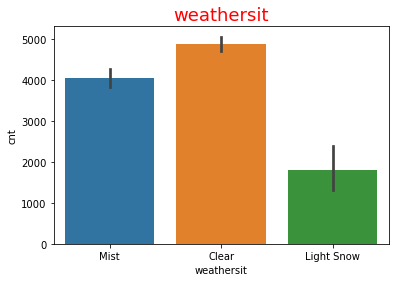

In [45]:
#plot barplot of variable 'weathersit' wrt target variable 'cnt'
sns.barplot('weathersit','cnt',data=bike)
plt.title('weathersit', fontdict={'fontsize':18, 'color':'red'})
plt.show()

**Inference:**

- Bikes seem to be rented more in `Partly cloudy weather`.

### 3) mnth

- 1:Jan
- 2:Feb
- 3:Mar
- 4:Apr
- 5:May
- 6:June
- 7:July
- 8:Aug
- 9:Sep
- 10:Oct
- 11:Nov
- 12:Dec

In [46]:
# replacing variable values with its subsequent labels
bike['mnth'] = bike['mnth'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

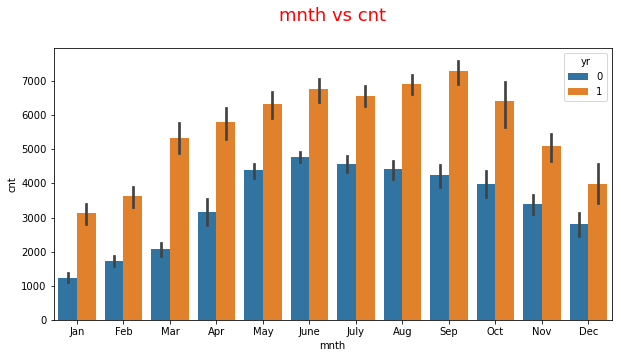

In [47]:
#plot barplot of variable 'mnth' wrt target variable 'cnt'
plt.figure(figsize=(10,5))
sns.barplot('mnth','cnt',hue='yr',data=bike)
plt.title('mnth vs cnt\n', fontdict={'fontsize':18, 'color':'red'})
plt.show()

**Inference:**

- Bike rented popularity is more in the month of `August` and `September 2019`.

### 4) workingday

- 1 : If day is neither weekend nor holiday 
- 0 : Otherwise 

In [48]:
# replacing variable values with its subsequent labels
bike['workingday'] = bike['workingday'].map({1:'Working day',0:'Holiday'})

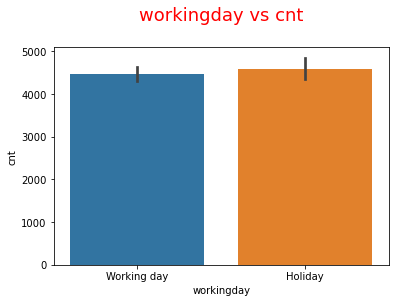

In [49]:
#plot barplot of variable 'workingday' wrt target variable 'cnt'
sns.barplot('workingday','cnt',data=bike)
plt.title('workingday vs cnt\n', fontdict={'fontsize':18, 'color':'red'})
plt.show()

**Inference:**
- Bikes seem to be rented more on `holidays`.

### 5) weekday:

- 0: Mon
- 1: Tue
- 2: Wed
- 3: Thu
- 4: Fri
- 5: Sat
- 6: Sun

In [50]:
# replacing variable values with its subsequent labels
bike['weekday'] = bike['weekday'].map({0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'} )

In [51]:
#cross-checking the values of 'weekday'
bike.weekday.unique()

array(['Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'Mon'], dtype=object)

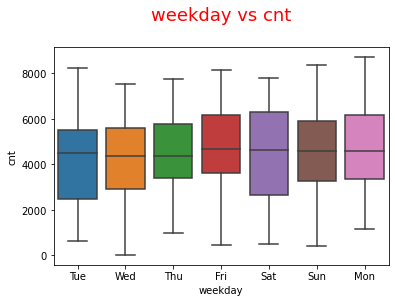

In [52]:
#plot boxplot of variable ' weekday' wrt target variable 'cnt'
sns.boxplot('weekday','cnt',data=bike)
plt.title('weekday vs cnt\n', fontdict={'fontsize':18, 'color':'red'})
plt.show()

**`Inference:`**

- We can't infer much detail about the variable `weekday` as we can see in the boxplot median of the `weekday 0,1,2,3,6` are nearly same.


In [53]:
#checking dataframe after labelling
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Tue,Working day,Mist,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Wed,Working day,Mist,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Thu,Working day,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Fri,Working day,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Sat,Working day,Clear,9.305237,43.6957,12.522300,1600


In [54]:
# cross-checking data types of the variables
bike.dtypes

season         object
yr              int64
mnth           object
holiday         int64
weekday        object
workingday     object
weathersit     object
temp          float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

### -  Dummy Variables


- Create dummy varaibles for all the categorical features

### 1) season

In [55]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'seasons'

seasons = pd.get_dummies(bike['season'])

# Check what the dataset 'seasons' looks like
seasons

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
725,0,1,0,0
726,0,1,0,0
727,0,1,0,0
728,0,1,0,0


In [56]:
# Let's drop the first column from seasons df using 'drop_first = True'
seasons = pd.get_dummies( bike['season'], drop_first = True)

# Add the results to the original bike dataframe
bike = pd.concat([ bike, seasons], axis = 1)

# Now let's see the head of our dataframe.
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter
0,spring,0,Jan,0,Tue,Working day,Mist,14.110847,80.5833,10.749882,985,1,0,0
1,spring,0,Jan,0,Wed,Working day,Mist,14.902598,69.6087,16.652113,801,1,0,0
2,spring,0,Jan,0,Thu,Working day,Clear,8.050924,43.7273,16.636703,1349,1,0,0
3,spring,0,Jan,0,Fri,Working day,Clear,8.200000,59.0435,10.739832,1562,1,0,0
4,spring,0,Jan,0,Sat,Working day,Clear,9.305237,43.6957,12.522300,1600,1,0,0


In [57]:
# Drop 'season' as we have created the dummies for it
bike.drop(['season'], axis = 1, inplace = True)

bike.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter
0,0,Jan,0,Tue,Working day,Mist,14.110847,80.5833,10.749882,985,1,0,0
1,0,Jan,0,Wed,Working day,Mist,14.902598,69.6087,16.652113,801,1,0,0
2,0,Jan,0,Thu,Working day,Clear,8.050924,43.7273,16.636703,1349,1,0,0
3,0,Jan,0,Fri,Working day,Clear,8.200000,59.0435,10.739832,1562,1,0,0
4,0,Jan,0,Sat,Working day,Clear,9.305237,43.6957,12.522300,1600,1,0,0


### 2) mnth

In [58]:
# Get the dummy variables for the feature 'mnth' and store it in a new variable - 'month'

month = pd.get_dummies(bike['mnth'])

# Check what the dataset 'month' looks like
month

,Apr,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
725,0,0,1,0,0,0,0,0,0,0,0,0
726,0,0,1,0,0,0,0,0,0,0,0,0
727,0,0,1,0,0,0,0,0,0,0,0,0
728,0,0,1,0,0,0,0,0,0,0,0,0


In [59]:
# Let's drop the first column from month df using 'drop_first = True'
month = pd.get_dummies( bike['mnth'], drop_first = True)

# Add the results to the original bike dataframe
bike = pd.concat([ bike, month], axis = 1)

# Now let's see the head of our dataframe.
bike.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
0,0,Jan,0,Tue,Working day,Mist,14.110847,80.5833,10.749882,985,...,0,0,1,0,0,0,0,0,0,0
1,0,Jan,0,Wed,Working day,Mist,14.902598,69.6087,16.652113,801,...,0,0,1,0,0,0,0,0,0,0
2,0,Jan,0,Thu,Working day,Clear,8.050924,43.7273,16.636703,1349,...,0,0,1,0,0,0,0,0,0,0
3,0,Jan,0,Fri,Working day,Clear,8.200000,59.0435,10.739832,1562,...,0,0,1,0,0,0,0,0,0,0
4,0,Jan,0,Sat,Working day,Clear,9.305237,43.6957,12.522300,1600,...,0,0,1,0,0,0,0,0,0,0


In [60]:
# Drop 'mnth' as we have created the dummies for it
bike.drop(['mnth'], axis = 1, inplace = True)

bike.head()

,yr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
0,0,0,Tue,Working day,Mist,14.110847,80.5833,10.749882,985,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,Wed,Working day,Mist,14.902598,69.6087,16.652113,801,1,...,0,0,1,0,0,0,0,0,0,0
2,0,0,Thu,Working day,Clear,8.050924,43.7273,16.636703,1349,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,Fri,Working day,Clear,8.200000,59.0435,10.739832,1562,1,...,0,0,1,0,0,0,0,0,0,0
4,0,0,Sat,Working day,Clear,9.305237,43.6957,12.522300,1600,1,...,0,0,1,0,0,0,0,0,0,0


### 3) weekday

In [61]:
# Get the dummy variables for the feature 'weekday' and store it in a new variable - 'week_day'

week_day = pd.get_dummies(bike['weekday'])

# Check what the dataset 'week_day' looks like
week_day

,Fri,Mon,Sat,Sun,Thu,Tue,Wed
0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1
2,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...
725,0,0,1,0,0,0,0
726,0,0,0,1,0,0,0
727,0,1,0,0,0,0,0
728,0,0,0,0,0,1,0


In [62]:
# Let's drop the first column from week_day df using 'drop_first = True'
week_day = pd.get_dummies( bike['weekday'], drop_first = True)

# Add the results to the original bike dataframe
bike = pd.concat([ bike, week_day], axis = 1)

# Now let's see the head of our dataframe.
bike.head()

,yr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,0,0,Tue,Working day,Mist,14.110847,80.5833,10.749882,985,1,...,0,0,0,0,0,0,0,0,1,0
1,0,0,Wed,Working day,Mist,14.902598,69.6087,16.652113,801,1,...,0,0,0,0,0,0,0,0,0,1
2,0,0,Thu,Working day,Clear,8.050924,43.7273,16.636703,1349,1,...,0,0,0,0,0,0,0,1,0,0
3,0,0,Fri,Working day,Clear,8.200000,59.0435,10.739832,1562,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,Sat,Working day,Clear,9.305237,43.6957,12.522300,1600,1,...,0,0,0,0,0,1,0,0,0,0


In [63]:
# Drop 'weekday' as we have created the dummies for it
bike.drop(['weekday'], axis = 1, inplace = True)

bike.head()

,yr,holiday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,0,0,Working day,Mist,14.110847,80.5833,10.749882,985,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,Working day,Mist,14.902598,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,Working day,Clear,8.050924,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,Working day,Clear,8.200000,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,Working day,Clear,9.305237,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,1,0,0,0,0


### 4) workingday

In [64]:
# Get the dummy variables for the feature 'workingday' and store it in a new variable - 'working_day'

working_day = pd.get_dummies(bike['workingday'])

# Check what the dataset 'working_day' looks like
working_day

,Holiday,Working day
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
725,0,1
726,1,0
727,1,0
728,0,1


In [65]:
# Let's drop the first column from working_day df using 'drop_first = True'
working_day= pd.get_dummies( bike['workingday'], drop_first = True)

# Add the results to the original bike dataframe
bike = pd.concat([ bike, working_day], axis = 1)

# Now let's see the head of our dataframe.
bike.head()

,yr,holiday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,...,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Working day
0,0,0,Working day,Mist,14.110847,80.5833,10.749882,985,1,0,...,0,0,0,0,0,0,0,1,0,1
1,0,0,Working day,Mist,14.902598,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,0,0,1,1
2,0,0,Working day,Clear,8.050924,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0,0,Working day,Clear,8.200000,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,Working day,Clear,9.305237,43.6957,12.522300,1600,1,0,...,0,0,0,0,1,0,0,0,0,1


In [66]:
# Drop 'workingday' as we have created the dummies for it
bike.drop(['workingday'], axis = 1, inplace = True)
bike.head()

,yr,holiday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter,...,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Working day
0,0,0,Mist,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,0,0,0,0,1,0,1
1,0,0,Mist,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,0,0,1,1
2,0,0,Clear,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,0,Clear,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,Clear,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,1,0,0,0,0,1


### 5) weathersit

In [67]:
# Get the dummy variables for the feature 'weathersit' and store it in a new variable - 'weather'

weather = pd.get_dummies(bike['weathersit'])

# Check what the dataset 'weather' looks like
weather

,Clear,Light Snow,Mist
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,0,0,1
726,0,0,1
727,0,0,1
728,1,0,0


In [68]:
# Let's drop the first column from weather df using 'drop_first = True'
weather= pd.get_dummies( bike['weathersit'], drop_first = True)

# Add the results to the original bike dataframe
bike = pd.concat([ bike, weather], axis = 1)

# Now let's see the head of our dataframe.
bike.head()

,yr,holiday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter,...,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Working day,Light Snow,Mist
0,0,0,Mist,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,0,0,1,0,1,0,1
1,0,0,Mist,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,1,0,1
2,0,0,Clear,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0,0,Clear,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,Clear,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,1,0,0,0,0,1,0,0


In [69]:
# Drop 'weathersit' as we have created the dummies for it
bike.drop(['weathersit'], axis = 1, inplace = True)

bike.head()

,yr,holiday,temp,hum,windspeed,cnt,spring,summer,winter,Aug,...,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Working day,Light Snow,Mist
0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,...,0,0,0,0,0,1,0,1,0,1
1,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,...,0,0,0,0,0,0,1,1,0,1
2,0,0,8.050924,43.7273,16.636703,1349,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0,0,8.200000,59.0435,10.739832,1562,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,9.305237,43.6957,12.522300,1600,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0


### ii) Splitting the Data into Training and Testing Sets

 
 - As we know, the first basic step for regression is performing a train-test split.

In [70]:
# import library for train test split

from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

In [71]:
#checking and printing splitted data frame dimensions
print(df_train.shape)
print(df_test.shape)

(510, 29)
(219, 29)


###  iii). Rescaling the Features 

We can see that except for `temp`, `hum`, `windspeed`, `cnt` all the columns have small integer values.So it's extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. 

As we know, there are two common ways of rescaling:

1. Min-Max scaling (Normalization) : Between 0 and 1
2. Standardisation (mean-0, sigma-1) 

Here, we will use `MinMax scaling`.

In [72]:
# import library for rescaling

from sklearn.preprocessing import MinMaxScaler

In [73]:
# 1. instantiate/create an object
scaler = MinMaxScaler()

In [74]:
# 2. Apply scaler() to all the columns except the '0/1' and 'dummy' variables i.e. create a list of numeric variables
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

# 3. fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [75]:
#checking trained dataframe
df_train.head()

,yr,holiday,temp,hum,windspeed,cnt,spring,summer,winter,Aug,...,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Working day,Light Snow,Mist
653,1,0,0.509887,0.575354,0.300794,0.864243,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
576,1,0,0.815169,0.725633,0.264686,0.827658,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
426,1,0,0.442393,0.640189,0.255342,0.465255,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
728,1,0,0.245101,0.498067,0.663106,0.204096,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
482,1,0,0.395666,0.504508,0.188475,0.482973,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1


In [76]:
# summary to verify the min(0) and max(1) value 
df_train.describe()

,yr,holiday,temp,hum,windspeed,cnt,spring,summer,winter,Aug,...,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Working day,Light Snow,Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.096078,...,0.080392,0.137255,0.147059,0.129412,0.135294,0.154902,0.152941,0.711765,0.029412,0.343137
std,0.500429,0.157763,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.294988,...,0.272166,0.344454,0.354512,0.335985,0.342373,0.362166,0.360284,0.453386,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Step 4 : Training the Model

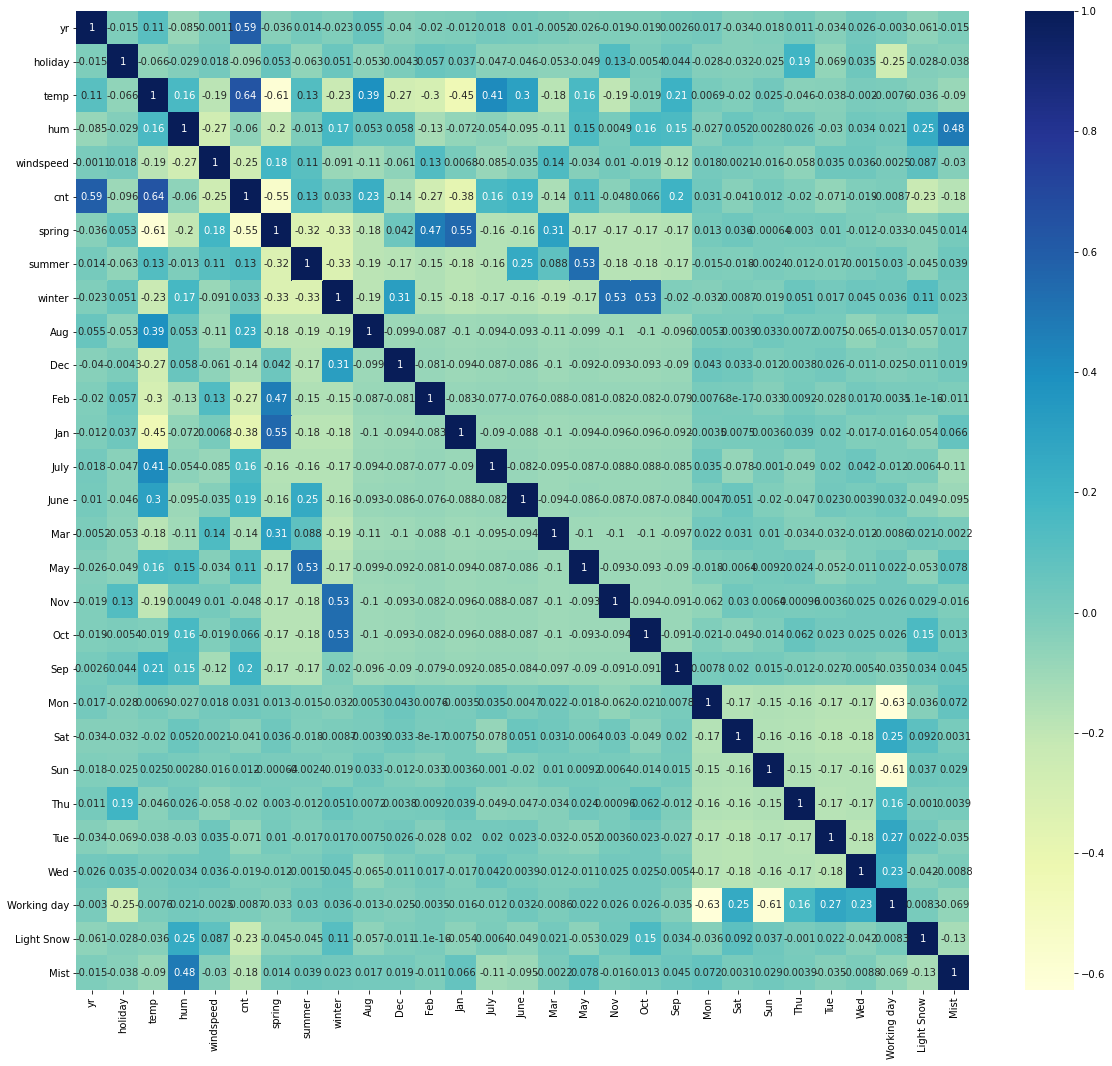

In [77]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 18))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

**`Inference:`**

- As we might have noticed, **`temp`** seems correlated to **`cnt`** the most. 

Let's see a scatter plot for **`temp`** vs **`cnt`**.

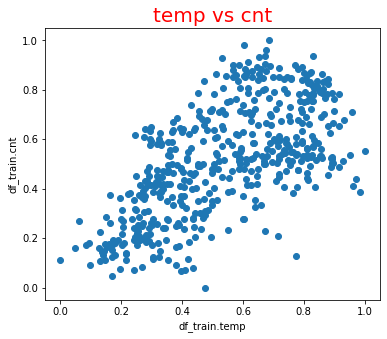

In [79]:
# plot graph between temp and cnt variable
plt.figure(figsize=[6,5])
plt.scatter(df_train.temp, df_train.cnt)
plt.title('temp vs cnt', fontdict={'fontsize':20, 'color':'red'})
plt.xlabel('df_train.temp')
plt.ylabel('df_train.cnt')
plt.show()

**`Inference:`**

- `temp` is highly correlated with the target variable `cnt`.

<h3> Dividing into X and Y sets for the model building</h3>

In [80]:
# X_train and y_train

# remove the target variable 'cnt' from the train dataset and stored it into a new varible y_train
y_train = df_train.pop('cnt')

# copy the rest data sets except `cnt` into a new dataframe X_train
X_train = df_train

## Step 5: Building a linear model


### RFE : 

- `Recursive feature elimination:` Automated Approach - Top 'n' features

- We can either use :
       
       - Forward Approach
       - Backward Approach
       
       
 - Here, we're using `Backward Approach` (reduce features one by one)

In [81]:
# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [82]:
# Running RFE with the output number of the variable equal to 15

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [83]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 9),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 13),
 ('Mar', False, 14),
 ('May', False, 6),
 ('Nov', True, 1),
 ('Oct', False, 11),
 ('Sep', True, 1),
 ('Mon', False, 5),
 ('Sat', False, 12),
 ('Sun', False, 4),
 ('Thu', False, 10),
 ('Tue', False, 8),
 ('Wed', False, 7),
 ('Working day', False, 3),
 ('Light Snow', True, 1),
 ('Mist', True, 1)]

In [84]:
# columns that are significant (True)
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'Dec', 'Jan', 'July', 'Nov', 'Sep', 'Light Snow', 'Mist'],
      dtype='object')

In [85]:
# columns that are not significant (False)
X_train.columns[~rfe.support_]

Index(['Aug', 'Feb', 'June', 'Mar', 'May', 'Oct', 'Mon', 'Sat', 'Sun', 'Thu',
       'Tue', 'Wed', 'Working day'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

Fit a regression line through the training data using **`statsmodels`**.Remember that in **`statsmodels`**, we need to explicitly fit a constant using **`sm.add_constant(X)`** because if we don't perform this step, **`statsmodels`** fits a regression line passing through the origin, by default.

In [86]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [87]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

#### Model 1:

In [88]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [89]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Mon, 17 May 2021   Prob (F-statistic):          3.34e-189
Time:                        21:06:33   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3202      0.036      8.886      0.0

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. 

The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

##### Check for the VIF values of the feature variables. 

In [90]:
#import library for vif calculation 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [91]:
# drop the constant before vif calculation
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [92]:
# Create a dataframe that will contain the names of all the feature variables (RFE) and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,30.94
2,temp,17.80
4,windspeed,4.72
5,spring,4.37
7,winter,4.06
6,summer,2.81
14,Mist,2.32
0,yr,2.09
11,Nov,1.83
9,Jan,1.75


**_We generally want a VIF that is `less than 5` and p-value `less than 0.05`. So, there are clearly some variables we need to drop._**

#### Note - Algo for dropping variables :

- `High p-value, high VIF`  -->  Highly correlated > Insignificant var > drop easily


- `High-Low :`

 - High p-value, low VIF   -->  remove such variables first 
 - Low p-value, high VIF   -->  remove such variables after the above ones
 
 
 
- `Low p-value, low VIF`  -->   Less correlated > Significant var > can't drop

### Dropping the variable and updating the model

Here, we can see VIF of `hum` and `temp` is very high.We also know that the correlation between `Temp` and `cnt` is high. 


Let's first drop less significant variable which is `Dec` having p value `0.034`.

In [93]:
# Dropping insignificant variable 'Dec' having p-value 0.034

X_train_rfe = X_train_rfe.drop('Dec', axis=1)

#### Model 2:

In [94]:
# Build a second fitted model

X_train_rfe = sm.add_constant(X_train_rfe)

# create model

lm_2 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [95]:
#Let's see the summary of our linear model
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.4
Date:                Mon, 17 May 2021   Prob (F-statistic):          2.25e-189
Time:                        21:08:27   Log-Likelihood:                 512.39
No. Observations:                 510   AIC:                            -994.8
Df Residuals:                     495   BIC:                            -931.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3030      0.035      8.597      0.0

### Checking VIF


In [96]:
# drop the constant before vif calculation
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [97]:
# Calculate the VIFs again for the new model after dropping `Dec`

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,29.12
2,temp,16.80
4,windspeed,4.71
5,spring,4.37
7,winter,3.78
6,summer,2.79
13,Mist,2.29
0,yr,2.09
8,Jan,1.67
9,July,1.59


### Dropping another variable and updating the model

- After dropping `Dec` variable, we can see there is not much impact on R square value of existing model this means there is no significance of including `Dec` feature in the model. 

- Also, in the 2nd model summary, we can see there are few more insignificant variables having high p-value. We can drop one of them and re-build the model. 

Let's go ahead and drop variable `Nov` having p-value `0.144`

In [98]:
# Dropping insignificant variable 'Nov'

X_train_rfe = X_train_rfe.drop('Nov', axis=1)

#### Model 3:

In [99]:
# Build third fitted model

X_train_rfe = sm.add_constant(X_train_rfe)

# create model

lm_3 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [100]:
#Let's see the summary of our linear model
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.5
Date:                Mon, 17 May 2021   Prob (F-statistic):          4.45e-190
Time:                        21:08:31   Log-Likelihood:                 511.29
No. Observations:                 510   AIC:                            -994.6
Df Residuals:                     496   BIC:                            -935.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2957      0.035      8.466      0.0

### Checking VIF


In [101]:
# drop the constant before vif calculation
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [102]:
# Calculate the VIFs again for the new model after dropping Nov

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,29.05
2,temp,16.70
4,windspeed,4.66
5,spring,4.34
7,winter,3.38
6,summer,2.78
12,Mist,2.28
0,yr,2.09
8,Jan,1.67
9,July,1.59


### Dropping another variable and updating the model

- After dropping `Nov` variable there is still not much impact on R-square value of existing model.


- In model 3 summary, we can see there is still one insignificant variable `Jan` having p-value `0.06`.

Let's go ahead and drop this variable.

In [103]:
# Dropping insignificant variable 'Jan' having p-value 0.06

X_train_rfe = X_train_rfe.drop('Jan', axis=1)

#### Model 4:

In [104]:
# Build forth fitted model

X_train_rfe = sm.add_constant(X_train_rfe)

# create model

lm_4 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [105]:
#Let's see the summary of our linear model
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     221.2
Date:                Mon, 17 May 2021   Prob (F-statistic):          1.69e-190
Time:                        21:08:36   Log-Likelihood:                 509.47
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     497   BIC:                            -937.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2841      0.034      8.242      0.0

### Checking VIF


In [106]:
# drop the constant before vif calculation
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [107]:
# Calculate the VIFs again for the new model after dropping 'Jan'

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,28.06
2,temp,16.02
4,windspeed,4.65
5,spring,4.01
7,winter,3.35
6,summer,2.78
11,Mist,2.28
0,yr,2.08
8,July,1.58
9,Sep,1.38


### Dropping another variable and updating the model

- We can analyse the summary of 4th model, there p-value of the rest features looks good all near to 0. 


- But VIF of `humidity (hum)` variable is still very high and also from the heat map we can observe correlation of `hum` with `cnt` is very low and highly correlated with `temp` variable.

Let's go ahead and drop this variable `hum`.

In [108]:
# Dropping insignificant variable 'hum' having vif 28.06

X_train_rfe = X_train_rfe.drop('hum', axis=1)

#### Model 5:

In [109]:
# Build fifth fitted model

X_train_rfe = sm.add_constant(X_train_rfe)

# create model

lm_5 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [110]:
#Let's see the summary of our linear model
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Mon, 17 May 2021   Prob (F-statistic):          2.40e-187
Time:                        21:08:40   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1996      0.030      6.758      0.0

### Checking VIF


In [111]:
# drop the constant before vif calculation
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [112]:
# Calculate the VIFs again for the new model after dropping 'hum'

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.09
3,windspeed,4.60
5,summer,2.21
4,spring,2.08
0,yr,2.07
6,winter,1.79
7,July,1.58
10,Mist,1.55
8,Sep,1.34
9,Light Snow,1.08


**Inference:**

- Here we can see p-value of all variables are near to 0 but VIF of variable `temp` is `5.09`. We can't drop this directly since from EDA we know that the `temp` is highly linear and correlated with target variable `cnt`. Dropping this, may reduce R-square variable and also impacts on linearity of the model. 


- So, we need to find such a variable which impacts the VIF of `temp` variable, means which is highly correlated with `temp` variable. 


- From the above heat map that we've plotted in this Notebook, we can see variable `July` is highly correlated with `temp`.So we can try dropping this variable. 

Let's go ahead and drop this variable `July`.

In [113]:
# Drop insignificant variable 'July' having p-value 0.005

X_train_rfe = X_train_rfe.drop('July', axis=1)

#### Model 6:

In [114]:
# Build sixth fitted model

X_train_rfe = sm.add_constant(X_train_rfe)

# create model

lm_6 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [115]:
#Let's see the summary of our linear model
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     249.2
Date:                Mon, 17 May 2021   Prob (F-statistic):          7.36e-187
Time:                        21:08:44   Log-Likelihood:                 495.16
No. Observations:                 510   AIC:                            -968.3
Df Residuals:                     499   BIC:                            -921.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1910      0.030      6.456      0.0

In [116]:
# drop the constant before vif calculation
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [117]:
# Calculate the VIFs again for the new model after dropping 'July'

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.59
2,temp,3.84
0,yr,2.07
4,spring,1.99
5,summer,1.89
6,winter,1.63
9,Mist,1.54
7,Sep,1.23
8,Light Snow,1.08
1,holiday,1.04


**`Inferences:`**

- It was the right decision of dropping `July` variable in model 6, since it was highly correlated with `temp` which increased the `VIF` value of `temp` variable. Also, there is negligible impact on R-square value.


- As we analyse the summary of model 6, we observed that p-values of all the features is significant i.e. `less than 0.05` and their corresponding VIFs are also significant i.e. `less than 5`.


-  So, at this point we are good with the p-values. But we've **`10 features`** in the model 6 as we know `features` should be `less than 10`. 


_So, lets do one more attempt in order to make the model more significant with sufficient no. of features._

- **_Lets try dropping less significant variable, means the feature having high `p-value` among all the variables. Also we can drop variable having high `VIF` among all._**


- For now, we're going with VIF hence consider `windspeed` variable having VIF `4.59`.

Let's go ahead and drop this variable `windspeed` and observe the effect on the model.

In [118]:
# Dropping insignificant variable 'windspeed' having vif 4.59


X_train_rfe = X_train_rfe.drop('windspeed', axis=1)

#### Model 7:

In [119]:
# Build seventh fitted model

X_train_rfe_sm = sm.add_constant(X_train_rfe)

# create model

lm_7 = sm.OLS(y_train,X_train_rfe_sm).fit()   # Running the linear model

In [120]:
#Let's see the summary of our linear model
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     256.0
Date:                Mon, 17 May 2021   Prob (F-statistic):          6.89e-181
Time:                        21:08:48   Log-Likelihood:                 478.19
No. Observations:                 510   AIC:                            -936.4
Df Residuals:                     500   BIC:                            -894.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1415      0.029      4.833      0.0

In [121]:
# X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [122]:
# Calculate the VIFs again for the new model after dropping 'windspeed'
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,2.89
0,yr,2.06
4,summer,1.62
8,Mist,1.54
5,winter,1.44
3,spring,1.33
6,Sep,1.23
7,Light Snow,1.07
1,holiday,1.04


**`Inference:`**

- Here, we are good with `number of features`, `p-values`, `VIFs` of all the `9` significant features that we obtained in `model 7`.


- So, we will consider this **`model 7`** as **`final model`** and now predict the test data. 

<h2><font color=red><u>Report the conclusion of train data </u> :</font> </h2>

- ### Final Model : lm_7
- ### R square : 0.822
- ### Adj R Square : 0.818

**Note : Ideal value of R square for `trained data` should be between : 82% - 89%**

## Step 6: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [123]:
# Predicted y_train data
y_train_pred = lm_7.predict(X_train_rfe_sm)
y_train_pred

653    0.721596
576    0.774075
426    0.448542
728    0.430249
482    0.541341
         ...   
526    0.751497
578    0.797991
53     0.176339
350    0.281884
79     0.341082
Length: 510, dtype: float64

#### Check the assumption of Linear Regression

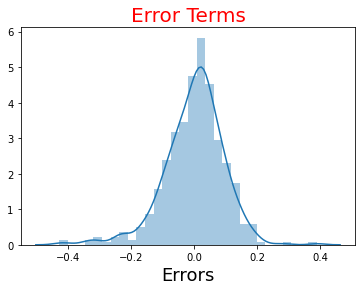

In [124]:
# Plot the histogram of the error terms
fig = plt.figure()

#find error terms/residuals ( yi - y_pred)
res = y_train - y_train_pred

# plot distribution graph
sns.distplot(res)
plt.title('Error Terms', fontdict={'fontsize' : 20, 'color':'red'})   # Plot heading
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

**`Inferences:`**

- We can see in the above distribution plot, Error terms/residuals are **`Normally Distributed`**.


- So, it follows one of the assumption of `Linear Regression` which is **`Error terms should be normally distributed with mean 0.`**

**Lets see Residuals are having any patterns or not**

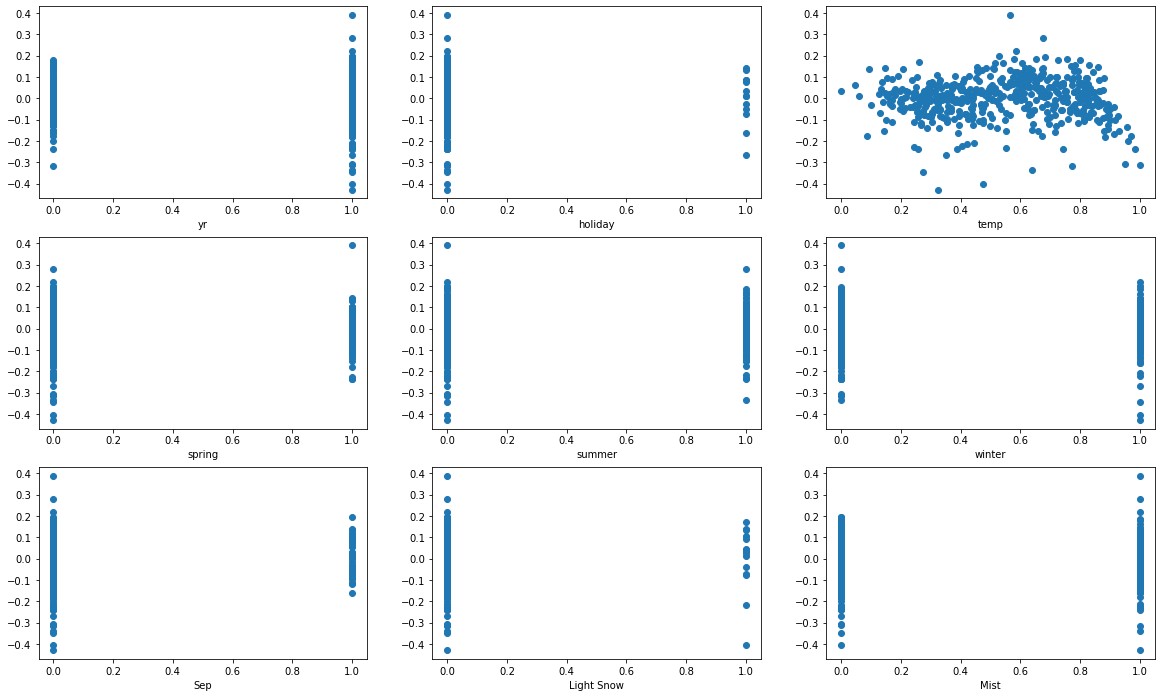

In [125]:
# import math library

import math

# plot scatter plots of significant variables wrt residuals

plt.figure(figsize = (20,12))

# stored the significant varibles obtained in model 7 in a new variable 'cols'

cols = X_train_rfe.columns

for row in enumerate(cols):    
    plt.subplot(math.ceil(len(cols)/3),3,row[0]+1)
    plt.scatter(X_train_rfe[row[1]],res)
    plt.xlabel(row[1])
    
plt.show()

**`Inference:`**

- `temp` is continuous variable hence `residuals` are scattered for all data points between 0 to 1 whereas other variables are having  data points at 0 and 1 value only.

In [126]:
#re-checking the column length of trained data (X_train_rfe)
len(cols)

9

## Step 7 : Predictions and Evaluation on the Test Set Using the Final Model


Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. `model 7`.

#### Applying the scaling on the test sets :


- Since, we do not fit scaling for `test set`; we can only apply scaling using `min-max` fit of train data


  - **transform() : (x - xmin) / (xmax - xmin)**



In [127]:
#create a list of numerical variables
num_vars = ['temp','hum','windspeed','cnt']

# Fit on data
df_test[num_vars] = scaler.transform(df_test[num_vars])

#checking top rows of the data frame
df_test.head()

,yr,holiday,temp,hum,windspeed,cnt,spring,summer,winter,Aug,...,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Working day,Light Snow,Mist
184,0,1,0.831783,0.657364,0.084219,0.692706,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
535,1,0,0.901354,0.610133,0.153728,0.712034,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,0.511964,0.837699,0.334206,0.303382,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
221,0,0,0.881625,0.437098,0.339570,0.547400,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
152,0,0,0.817246,0.314298,0.537414,0.569029,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [128]:
#check summary of test data

df_test.describe()

,yr,holiday,temp,hum,windspeed,cnt,spring,summer,winter,Aug,...,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Working day,Light Snow,Mist
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.558941,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,0.059361,...,0.086758,0.155251,0.132420,0.173516,0.155251,0.118721,0.123288,0.639269,0.027397,0.319635
std,0.500722,0.188034,0.233698,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,0.236840,...,0.282125,0.362974,0.339723,0.379560,0.362974,0.324202,0.329520,0.481313,0.163612,0.467403
min,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,0.759096,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [129]:
# Divide test data set into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [130]:
#check top 5 rows
X_test.head()

,yr,holiday,temp,hum,windspeed,spring,summer,winter,Aug,Dec,...,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Working day,Light Snow,Mist
184,0,1,0.831783,0.657364,0.084219,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
535,1,0,0.901354,0.610133,0.153728,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,0.511964,0.837699,0.334206,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
221,0,0,0.881625,0.437098,0.339570,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
152,0,0,0.817246,0.314298,0.537414,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [131]:
#check top 5 rows
y_test.head()

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

In [132]:
# Adding constant variable to test dataframe

X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,temp,hum,windspeed,spring,summer,winter,Aug,...,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Working day,Light Snow,Mist
184,1.0,0,1,0.831783,0.657364,0.084219,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
535,1.0,1,0,0.901354,0.610133,0.153728,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
299,1.0,0,0,0.511964,0.837699,0.334206,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
221,1.0,0,0,0.881625,0.437098,0.339570,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
152,1.0,0,0,0.817246,0.314298,0.537414,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [133]:
# Select only those variables which are present in final model
X_test_sm = X_test_sm[X_train_rfe.columns]

In [134]:
#checking top rows of test dataframe
X_test_sm.head()

,yr,holiday,temp,spring,summer,winter,Sep,Light Snow,Mist
184,0,1,0.831783,0,0,0,0,0,1
535,1,0,0.901354,0,1,0,0,0,0
299,0,0,0.511964,0,0,1,0,0,1
221,0,0,0.881625,0,0,0,0,0,0
152,0,0,0.817246,0,1,0,0,0,0


In [135]:
# add constant to test dataset
X_test_sm = sm.add_constant(X_test_sm)
X_test_sm.head()

,const,yr,holiday,temp,spring,summer,winter,Sep,Light Snow,Mist
184,1.0,0,1,0.831783,0,0,0,0,0,1
535,1.0,1,0,0.901354,0,1,0,0,0,0
299,1.0,0,0,0.511964,0,0,1,0,0,1
221,1.0,0,0,0.881625,0,0,0,0,0,0
152,1.0,0,0,0.817246,0,1,0,0,0,0


In [136]:
# Making predictions using the model 7
y_test_pred = lm_7.predict(X_test_sm)

In [137]:
#checking top rows of predicted test dataframe
y_test_pred.head()

184    0.371082
535    0.867542
299    0.411133
221    0.573551
152    0.593234
dtype: float64

#### - check the R square for test data

In [138]:
# import library for evaluating r2

from sklearn.metrics import r2_score

#evaluate r2 for test data

r2_score(y_true = y_test, y_pred = y_test_pred)

0.8088172921479284

#### - check the adjusted R square for test data

In [139]:
# Adjusted R square for test data
r2_adj = 1- (((1-0.8090304806579873)*(1-len(y_test_pred)))/(1-9-len(y_test_pred)))
r2_adj

0.8166019593984195

**Note : Ideal value of R square for test data should lies between : 78% - 85 %**

## Step 8: Model Evaluation

Let's now plot the graph for actual versus predicted values where :
- `y_test` is the test data set for the target variable, and


- `y_pred` is the variable containing the predicted values of the target variable on the test set.


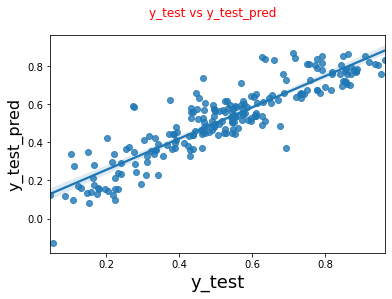

In [140]:
# Plotting regression plot for y_test and y_pred to understand the spread

fig = plt.figure()
sns.regplot(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontdict={'fontsize' : 20, 'color':'red'})              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                                                           # x-label
plt.ylabel('y_test_pred', fontsize = 16)                                                      # y-label
plt.show() 

**Inference:**

- As we can see in the above model, moreover data points are around regression line.So, we can say that less error in our final model. 

**_So,this is the best fitted regression line and hence this is a significant linear regression model_**

<h2><font color=red><u>Report the result of train and test data </u> :</font> </h2>

### Train Data :

- R-square :  0.822

- Adjusted R-square :  0.818   


### Test Data :

- R-square :  0.809

- Adjusted R-square :  0.817   


_**This seems to be a really good model that can very well 'Generalize' various datasets.**_

## Step 9 : Report  the Final Model

Generalised Equation of linear regression : 


 **`y = c + m1x1 + m2x2 + m3x3 + .......+ mnxn`** 


   - m = slope of the independent variable (i.e. coeffient)

   - c = const

We can see that the equation of our best fitted line is: 

$ cnt = 0.1415 + (0.2331  \times  yr) - (0.0997  \times  holiday) + (0.4900 \times temp) - (0.0645 \times spring) + (0.0512 \times summer) + (0.0971 \times winter) + (0.0954 \times Sep) - (0.3008 \times Light Snow) - (0.0784 \times Mist)  $


### Interpretation of Coefficients:¶



- **`const:`** The Constant value of **0.1415** indicated that, in the absence of all other predictor variables (i.e. when x1,x2...xn =0), The bike rental can still increase by 0.1415 units.



- **`yr:`** A coefficient value of **0.2331** indicated that a unit increase in yr variable, increases the bike hire numbers by 0.2331 units.


- **`holiday:`** A coefficient value of **-0.0997** indicated that,w.r.t working day, a unit increase in holiday variable decreases the bike hire numbers by -0.0997 units.


- **`temp:`** A coefficient value of **0.4900** indicated that a unit increase in temp variable, increases the bike hire numbers by 0.4900 units.


-  **`spring:`** A coefficient value of **-0.0645** indicated that,w.r.t other variables, a unit increase in spring variable decreases the bike hire numbers by -0.0645 units.


- **`summer:`** A coefficient value of **0.0512** indicated that, w.r.t other variables, a unit increase in summer variable, increases the bike hire numbers by 0.0512 units.


- **`winter:`** A coefficient value of **0.0971** indicated that, w.r.t other variables, a unit increase in winter variable, increases the bike hire numbers by 0.0971 units.



- **`Sep:`** A coefficient value of **0.0954** indicated that w.r.t Jan, a unit increase in Sep variable increases the bike hire numbers by 0.0954 units.


-  **`LightSnow:`** A coefficient value of **-0.3008** indicated that,w.r.t other variables, a unit increase in LightSnow variable decreases the bike hire numbers by -0.3008 units.


-  **`Mist:`** A coefficient value of **-0.0784** indicated that,w.r.t other variables, a unit increase in Mist variable decreases the bike hire numbers by -0.0784 units.


### As per our final Model, the `top 3 predictor variables` that influences the bike booking are:



1) **Temperature (temp)** - A coefficient value of **0.4900** indicated that a unit increase in temp variable increases the bike hire numbers by 0.4900 units.


2) **Light Snow (LightSnow)** - A coefficient value of **-0.3008** indicated that,w.r.t other variables, a unit increase in LightSnow variable decreases the bike hire numbers by -0.3008 units.


3) **Year (yr)** - A coefficient value of **0.2331** indicated that a unit increase in yr variable increases the bike hire numbers by 0.2331 units.





_**Note: So, it is suggested to consider these variables are the most important variables while planning, to achive maximum Booking.**_


- **The next best features that can also be considered are:**

4) **holiday** -  A coefficient value of **-0.0997** indicated that,w.r.t working day, a unit increase in holiday variable decreases the bike hire numbers by -0.0997 units.


5) **winter**  -  A coefficient value of **0.0971** indicated that, w.r.t other variables, a unit increase in winter variable, increases the bike hire numbers by 0.0971 units.
